In [1]:
import kagglehub
path = kagglehub.dataset_download("jihyeseo/online-retail-data-set-from-uci-ml-repo")
print("Path to dataset files:", path)

100%|██████████| 21.8M/21.8M [00:00<00:00, 60.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo/versions/1


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_excel(path + '/Online Retail.xlsx')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## **Cleaning Data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [5]:
data.dropna(subset=['CustomerID'], inplace=True)
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [6]:
data.duplicated().sum()

np.int64(5225)

In [7]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [8]:
data['CustomerID'] = data['CustomerID'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


## **RFM Calculations**

In [9]:
max_date = data['InvoiceDate'].max()
recency_data = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_data['Recency'] = (max_date - recency_data['InvoiceDate']).dt.days
recency_data.head()

,CustomerID,InvoiceDate,Recency
0,12346,2011-01-18 10:17:00,325
1,12347,2011-12-07 15:52:00,1
2,12348,2011-09-25 13:13:00,74
3,12349,2011-11-21 09:51:00,18
4,12350,2011-02-02 16:01:00,309


In [10]:
frequency_data = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_data.rename(columns={'InvoiceNo':'Frequency'}, inplace=True)
frequency_data.head()

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [11]:
zero_spend = data[data['Quantity'] * data['UnitPrice'] == 0]
print(zero_spend[['CustomerID', 'Quantity', 'UnitPrice', 'InvoiceDate']])

        CustomerID  Quantity  UnitPrice         InvoiceDate
9302         12647         1        0.0 2010-12-05 14:02:00
33576        16560         4        0.0 2010-12-16 14:36:00
40089        14911        10        0.0 2010-12-21 13:45:00
47068        13081        24        0.0 2011-01-06 16:41:00
47070        13081        24        0.0 2011-01-06 16:41:00
56674        15107         1        0.0 2011-01-13 15:10:00
86789        17560        16        0.0 2011-02-10 13:08:00
130188       13239        36        0.0 2011-03-23 10:25:00
139453       13113         5        0.0 2011-03-30 12:45:00
145208       14410         2        0.0 2011-04-04 14:42:00
157042       12457         1        0.0 2011-04-14 18:57:00
187613       17667         4        0.0 2011-05-12 15:21:00
198383       12415        80        0.0 2011-05-20 14:13:00
279324       16818         1        0.0 2011-07-26 12:24:00
282912       12507        11        0.0 2011-07-28 17:09:00
285657       15581         1        0.0 

In [12]:
data['TotalSpent'] = data['Quantity'] * data['UnitPrice']
data = data[data['TotalSpent'] > 0]
monetary_data = data.groupby('CustomerID')['TotalSpent'].sum().reset_index()
monetary_data.rename(columns={'TotalSpent':'Monetary'}, inplace=True)
monetary_data.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [13]:
rfm = recency_data.merge(frequency_data, on='CustomerID').merge(monetary_data, on='CustomerID')

## **Segmenting Customers**

In [14]:
rfm['recency_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1], duplicates='drop')
rfm['frequency_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[5,4,3,2,1], duplicates='drop')
rfm['monetary_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[5,4,3,2,1], duplicates='drop')

In [15]:
def segment_customers(row):
  if row['recency_score']>=4 and row['frequency_score']>=4 and row['monetary_score']>=4:
    return "Master Customers"
  elif row['frequency_score']>=3:
    return "Loyal Customers"
  elif row['recency_score']==1 and row['frequency_score']>=3:
    return "Unstable Customers"
  else:
    return "Inactive Customers"
rfm['Segment'] = rfm.apply(segment_customers, axis=1)

In [16]:
rfm.head()

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,Segment
0,12346,2011-01-18 10:17:00,325,2,77183.60,1,4,1,Loyal Customers
1,12347,2011-12-07 15:52:00,1,7,4310.00,5,2,1,Inactive Customers
2,12348,2011-09-25 13:13:00,74,4,1797.24,2,3,2,Loyal Customers
3,12349,2011-11-21 09:51:00,18,1,1757.55,4,5,2,Loyal Customers
4,12350,2011-02-02 16:01:00,309,1,334.40,1,5,4,Loyal Customers


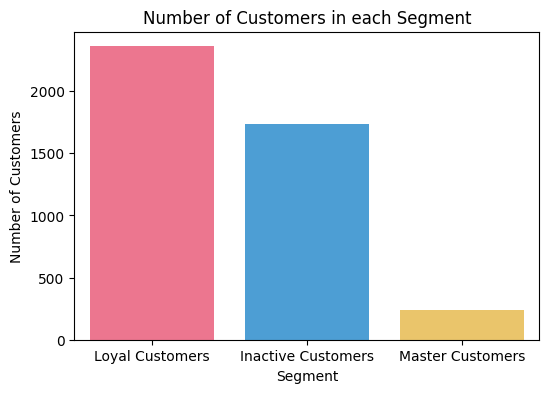

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
segments = rfm['Segment'].value_counts().index.tolist()  # Dynamically get all segments present
segment_counts = rfm['Segment'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=segments, y=segment_counts, palette=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0'])
plt.title('Number of Customers in each Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

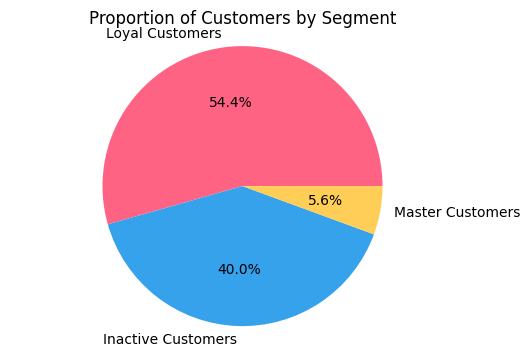

In [18]:
plt.figure(figsize=(6,4))
plt.pie(segment_counts, labels=segments, autopct='%1.1f%%', colors=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0'])
plt.title('Proportion of Customers by Segment')
plt.axis('equal')
plt.show()

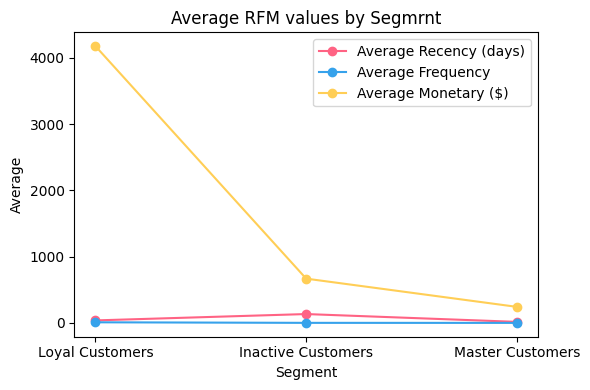

In [19]:
recency_avg = rfm.groupby('Segment')['Recency'].mean()
frequency_avg = rfm.groupby('Segment')['Frequency'].mean()
monetary_avg = rfm.groupby('Segment')['Monetary'].mean()
plt.figure(figsize=(6,4))
plt.plot(segments, recency_avg, marker='o', label='Average Recency (days)', color='#FF6384')
plt.plot(segments, frequency_avg, marker='o', label='Average Frequency', color='#36A2EB')
plt.plot(segments, monetary_avg, marker='o', label='Average Monetary ($)', color='#FFCE56')
plt.title('Average RFM values by Segmrnt')
plt.xlabel('Segment')
plt.ylabel('Average')
plt.legend()
plt.tight_layout()
plt.show()

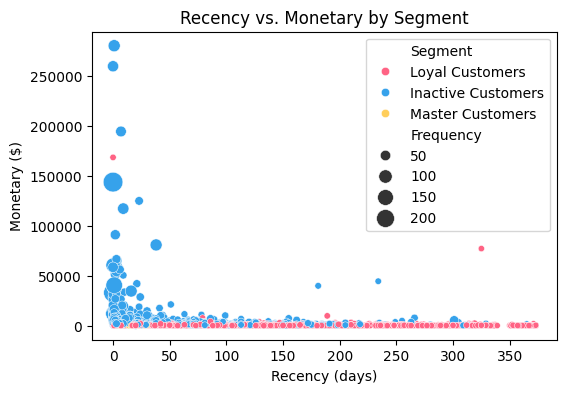

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Recency', y='Monetary', hue='Segment', size='Frequency', sizes=(20, 200), data=rfm, palette=['#FF6384', '#36A2EB', '#FFCE5B', '#4BC0C0'])
plt.title('Recency vs. Monetary by Segment')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary ($)')
plt.show()

In [21]:
rfm.to_csv('rfm_data.csv', index=False)
data.to_excel('cleaned_online_retail.xlsx', index=False)